In [20]:
import pandas as pd
from functools import reduce

import seaborn as sns
import matplotlib.pyplot as plt
import koreanize_matplotlib

### 1. 데이터 불러오기

In [71]:
customers = pd.read_csv('../data/olist_customers_dataset.csv')
geolocation = pd.read_csv('../data/olist_geolocation_dataset.csv')
orders = pd.read_csv('../data/olist_orders_dataset.csv')
order_items = pd.read_csv('../data/olist_order_items_dataset.csv')
order_payments = pd.read_csv('../data/olist_order_payments_dataset.csv')
order_reviews = pd.read_csv('../data/olist_order_reviews_dataset.csv')
products = pd.read_csv('../data/olist_products_dataset.csv')
sellers = pd.read_csv('../data/olist_sellers_dataset.csv')
product_cat_name = pd.read_csv('../data/product_category_name_translation.csv')

### 2. 데이터프레임 합치기

In [72]:
df1 = reduce(lambda x,y: pd.merge(x,y, on='order_id', how='inner'), [order_items, orders, order_payments, order_reviews])
df2 = reduce(lambda x,y: pd.merge(x,y, on='customer_id', how='inner'), [df1, customers])
df3 = reduce(lambda x,y: pd.merge(x,y, on='product_id', how='inner'), [df2, products])
df4 = reduce(lambda x,y: pd.merge(x,y, on='seller_id', how='inner'), [df3, sellers])
df5 = reduce(lambda x,y: pd.merge(x,y, on='product_category_name', how='inner'), [df4, product_cat_name])
df5

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,...,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,product_category_name_english
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,...,598.0,4.0,650.0,28.0,9.0,14.0,27277,volta redonda,SP,cool_stuff
1,130898c0987d1801452a8ed92a670612,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-07-05 02:44:11,55.90,17.96,e6eecc5a77de221464d1c4eaff0a9b64,delivered,2017-06-28 11:52:20,...,598.0,4.0,650.0,28.0,9.0,14.0,27277,volta redonda,SP,cool_stuff
2,532ed5e14e24ae1f0d735b91524b98b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2018-05-23 10:56:25,64.90,18.33,4ef55bf80f711b372afebcb7c715344a,delivered,2018-05-18 10:25:53,...,598.0,4.0,650.0,28.0,9.0,14.0,27277,volta redonda,SP,cool_stuff
3,6f8c31653edb8c83e1a739408b5ff750,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-07 18:55:08,58.90,16.17,30407a72ad8b3f4df4d15369126b20c9,delivered,2017-08-01 18:38:42,...,598.0,4.0,650.0,28.0,9.0,14.0,27277,volta redonda,SP,cool_stuff
4,7d19f4ef4d04461989632411b7e588b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-16 22:05:11,58.90,13.29,91a792fef70ecd8cc69d3c7feb3d12da,delivered,2017-08-10 21:48:40,...,598.0,4.0,650.0,28.0,9.0,14.0,27277,volta redonda,SP,cool_stuff
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115604,2c12150c742ae2fa48bc703964c16c5f,1,2b54fb9a4acf707537eb53eb2458c241,ef728fa1f17436c91ed1ccd03dcf9631,2018-08-02 17:50:12,57.90,19.60,ab0cf72dfe0538a63a57d6905ccb7b57,delivered,2018-07-28 17:55:27,...,923.0,5.0,1000.0,25.0,25.0,25.0,17201,jau,SP,arts_and_craftmanship
115605,2ef4a11b6e24fdfbb43b92cb5f95edff,1,9c313adb4b38a55b092f53f83f78be9e,ef728fa1f17436c91ed1ccd03dcf9631,2018-07-30 09:17:39,19.00,12.86,ee1cfdc92e449920e25d3ca4ab4da4f6,delivered,2018-07-23 18:35:14,...,660.0,3.0,500.0,16.0,6.0,16.0,17201,jau,SP,arts_and_craftmanship
115606,2ef4a11b6e24fdfbb43b92cb5f95edff,2,eacb104882d39ffb53140b1d1860a7c3,ef728fa1f17436c91ed1ccd03dcf9631,2018-07-30 09:17:39,39.90,12.87,ee1cfdc92e449920e25d3ca4ab4da4f6,delivered,2018-07-23 18:35:14,...,942.0,5.0,500.0,21.0,7.0,14.0,17201,jau,SP,arts_and_craftmanship
115607,9f7ba492c273ffac8f90a623b8eadd3b,1,5aa0d6ed4e6c0995d62090cd82cde89a,ef728fa1f17436c91ed1ccd03dcf9631,2018-08-28 03:24:24,11.90,12.79,c61336d6c835632048f973d2f2db598d,delivered,2018-08-23 12:31:37,...,654.0,3.0,200.0,16.0,6.0,16.0,17201,jau,SP,arts_and_craftmanship


In [186]:
df = df5.copy()

In [187]:
# 중복행 제거
df = df.drop_duplicates(['order_id'], keep='first')

In [188]:
len(df)

96516

In [189]:
df.drop(['review_comment_title', 'review_comment_message'], axis=1, inplace=True)
df.isnull().sum()

order_id                            0
order_item_id                       0
product_id                          0
seller_id                           0
shipping_limit_date                 0
price                               0
freight_value                       0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                  13
order_delivered_carrier_date      959
order_delivered_customer_date    2030
order_estimated_delivery_date       0
payment_sequential                  0
payment_type                        0
payment_installments                0
payment_value                       0
review_id                           0
review_score                        0
review_creation_date                0
review_answer_timestamp             0
customer_unique_id                  0
customer_zip_code_prefix            0
customer_city                       0
customer_state                      0
product_cate

In [190]:
df = df[['order_id','order_purchase_timestamp','customer_state','payment_value']]
df.head()

,order_id,order_purchase_timestamp,customer_state,payment_value
0,00010242fe8c5a6d1ba2dd792cb16214,2017-09-13 08:59:02,RJ,72.19
1,130898c0987d1801452a8ed92a670612,2017-06-28 11:52:20,GO,73.86
2,532ed5e14e24ae1f0d735b91524b98b9,2018-05-18 10:25:53,MG,83.23
3,6f8c31653edb8c83e1a739408b5ff750,2017-08-01 18:38:42,PR,75.07
4,7d19f4ef4d04461989632411b7e588b9,2017-08-10 21:48:40,MG,72.19


In [191]:
df['order_purchase_date'] = pd.to_datetime(df['order_purchase_timestamp'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96516 entries, 0 to 115608
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   order_id                  96516 non-null  object        
 1   order_purchase_timestamp  96516 non-null  object        
 2   customer_state            96516 non-null  object        
 3   payment_value             96516 non-null  float64       
 4   order_purchase_date       96516 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 4.4+ MB


In [192]:
df['purchase_year'] = df['order_purchase_date'].dt.year
df['purchase_month'] = df['order_purchase_date'].dt.month
df['purchase_day'] = df['order_purchase_date'].dt.day

df = df.drop(['order_purchase_date'], axis=1)
df

,order_id,order_purchase_timestamp,customer_state,payment_value,purchase_year,purchase_month,purchase_day
0,00010242fe8c5a6d1ba2dd792cb16214,2017-09-13 08:59:02,RJ,72.19,2017,9,13
1,130898c0987d1801452a8ed92a670612,2017-06-28 11:52:20,GO,73.86,2017,6,28
2,532ed5e14e24ae1f0d735b91524b98b9,2018-05-18 10:25:53,MG,83.23,2018,5,18
3,6f8c31653edb8c83e1a739408b5ff750,2017-08-01 18:38:42,PR,75.07,2017,8,1
4,7d19f4ef4d04461989632411b7e588b9,2017-08-10 21:48:40,MG,72.19,2017,8,10
...,...,...,...,...,...,...,...
115603,31a2886d02ad2127bfec204da2e93b66,2018-07-25 10:27:00,SP,27.20,2018,7,25
115604,2c12150c742ae2fa48bc703964c16c5f,2018-07-28 17:55:27,MG,77.50,2018,7,28
115605,2ef4a11b6e24fdfbb43b92cb5f95edff,2018-07-23 18:35:14,SP,84.63,2018,7,23
115607,9f7ba492c273ffac8f90a623b8eadd3b,2018-08-23 12:31:37,SP,24.69,2018,8,23


In [193]:
df['order_purchase_timestamp'] = df['order_purchase_timestamp'].str[:10]
df

,order_id,order_purchase_timestamp,customer_state,payment_value,purchase_year,purchase_month,purchase_day
0,00010242fe8c5a6d1ba2dd792cb16214,2017-09-13,RJ,72.19,2017,9,13
1,130898c0987d1801452a8ed92a670612,2017-06-28,GO,73.86,2017,6,28
2,532ed5e14e24ae1f0d735b91524b98b9,2018-05-18,MG,83.23,2018,5,18
3,6f8c31653edb8c83e1a739408b5ff750,2017-08-01,PR,75.07,2017,8,1
4,7d19f4ef4d04461989632411b7e588b9,2017-08-10,MG,72.19,2017,8,10
...,...,...,...,...,...,...,...
115603,31a2886d02ad2127bfec204da2e93b66,2018-07-25,SP,27.20,2018,7,25
115604,2c12150c742ae2fa48bc703964c16c5f,2018-07-28,MG,77.50,2018,7,28
115605,2ef4a11b6e24fdfbb43b92cb5f95edff,2018-07-23,SP,84.63,2018,7,23
115607,9f7ba492c273ffac8f90a623b8eadd3b,2018-08-23,SP,24.69,2018,8,23


In [194]:
df_day = pd.pivot_table(data=df, index='order_purchase_timestamp', values='payment_value', aggfunc='sum')
df_day = df_day.sort_index()
df_day

,payment_value
order_purchase_timestamp,
2016-09-04,136.23
2016-09-05,75.06
2016-10-02,109.34
2016-10-03,595.14
2016-10-04,11090.70
...,...
2018-08-26,9123.46
2018-08-27,5435.93
2018-08-28,4082.87


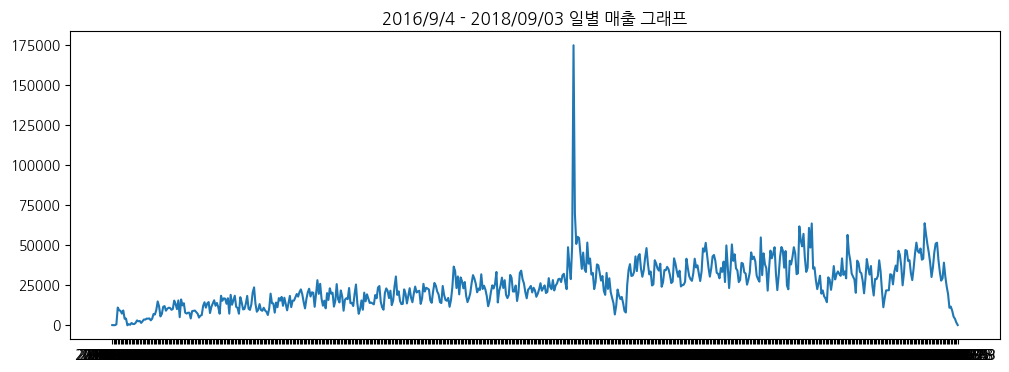

In [196]:
plt.figure(figsize=(12,4))
plt.plot(df_day['payment_value']);
plt.title('2016/9/4 - 2018/09/03 일별 매출 그래프')
plt.show()

In [101]:
print(df_day['payment_value'].max())
df_day[df_day['payment_value']==174830.45]

174830.45


,payment_value
order_purchase_timestamp,
2017-11-24,174830.45


- 매년 11월 24일은 블랙프라이데이다. 매출이 폭발적으로 증가하는 날이다. 

In [198]:
df_day_2017 = df_day[(df_day.index>='2017') & (df_day.index<'2018-04-01')]
df_day_2017 = df_day_2017.reset_index()
df_day_2017

,order_purchase_timestamp,payment_value
0,2017-01-05,707.27
1,2017-01-06,338.28
2,2017-01-07,1447.99
3,2017-01-08,809.63
4,2017-01-09,774.51
...,...,...
446,2018-03-27,38520.46
447,2018-03-28,33103.43
448,2018-03-29,32309.98
449,2018-03-30,25367.46


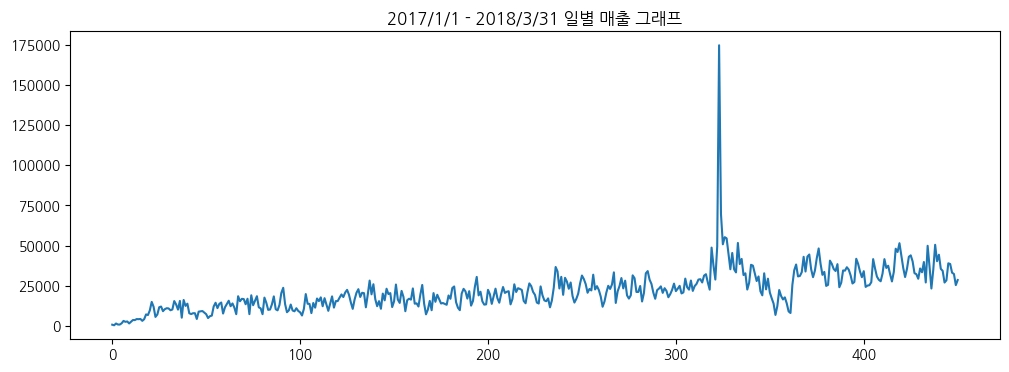

In [199]:
plt.figure(figsize=(12,4))
plt.plot(df_day_2017['payment_value']);
plt.title('2017/1/1 - 2018/3/31 일별 매출 그래프')
plt.show()

### 3. 모델링

In [200]:
from sklearn.model_selection import train_test_split

In [201]:
df_day_2017['order_purchase_date'] = pd.to_datetime(df_day_2017['order_purchase_timestamp'])

df_day_2017['purchase_year'] = df_day_2017['order_purchase_date'].dt.year
df_day_2017['purchase_month'] = df_day_2017['order_purchase_date'].dt.month
df_day_2017['purchase_day'] = df_day_2017['order_purchase_date'].dt.day

df_day_2017 = df_day_2017.drop(['order_purchase_date', 'order_purchase_timestamp'], axis=1)
df_day_2017

,payment_value,purchase_year,purchase_month,purchase_day
0,707.27,2017,1,5
1,338.28,2017,1,6
2,1447.99,2017,1,7
3,809.63,2017,1,8
4,774.51,2017,1,9
...,...,...,...,...
446,38520.46,2018,3,27
447,33103.43,2018,3,28
448,32309.98,2018,3,29
449,25367.46,2018,3,30


In [202]:
X = df_day_2017.iloc[:, 1:]
y = df_day_2017['payment_value']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=128)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((360, 3), (91, 3), (360,), (91,))

In [203]:
from sklearn.ensemble import *
from sklearn.tree import *
from lightgbm import LGBMRegressor

etsr = ExtraTreesRegressor()
rfr = RandomForestRegressor()
etr = ExtraTreeRegressor()
bgr = BaggingRegressor()
dtr = DecisionTreeRegressor()
lgbmr = LGBMRegressor()

In [155]:
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import *

def rmsle(y, y_pred):
    msle = mean_squared_log_error(y, y_pred)
    rmsle = np.sqrt(msle)
    return rmsle

def model_diff(x_train, x_test, y_train, y_test):
    etsr.fit(x_train, y_train)
    y_pred1 = etsr.predict(x_test)

    rfr.fit(x_train, y_train)
    y_pred2 = rfr.predict(x_test)
    
    etr.fit(x_train, y_train)
    y_pred3 = etr.predict(x_test)
    
    bgr.fit(x_train, y_train)
    y_pred4 = bgr.predict(x_test)
    
    dtr.fit(x_train, y_train)
    y_pred5 = dtr.predict(x_test)
    
    lgbmr.fit(x_train, y_train)
    y_pred6 = lgbmr.predict(x_test)
    
    estr_rmsle = rmsle(y_test, y_pred1)
    rfr_rmsle = rmsle(y_test, y_pred2)
    etr_rmsle = rmsle(y_test, y_pred3)
    bgr_rmsle = rmsle(y_test, y_pred4)
    dtr_rmsle = rmsle(y_test, y_pred5)
    lgbmr_rmsle = rmsle(y_test, y_pred6)

    result_rmsle_list = [estr_rmsle, rfr_rmsle, etr_rmsle, bgr_rmsle, dtr_rmsle, lgbmr_rmsle]

    return result_rmsle_list  

In [204]:
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import RobustScaler

# 정규화 진행하지 않은 상태
no_scaler = model_diff(x_train, x_test, y_train, y_test)

# Normalize 정규화 적용
norm = Normalizer()
x_train_norm = norm.fit_transform(x_train)
x_test_norm = norm.transform(x_test)
normalizer_scaler = model_diff(x_train_norm, x_test_norm, y_train, y_test)

# Robust 정규화 적용
robust = RobustScaler()
x_train_robust = robust.fit_transform(x_train)
x_test_robust = robust.transform(x_test)
robust_scaler = model_diff(x_train_robust, x_test_robust, y_train, y_test)

# 세 가지 케이스 RMSE 값 비교
result = pd.DataFrame(index=['ExtraTreesRegressor','RandomForestRegressor','ExtraTreeRegressor',
                            'BaggingRegressor','DecisionTreeRegressor','LGBMRegressor'], 
                    columns=['no_scaler', 'normalizer', 'robust', 'min'])
result['no_scaler'] = no_scaler
result['normalizer'] = normalizer_scaler
result['robust'] = robust_scaler

for idx, row in result.iterrows():
    result.loc[idx, 'min'] = row.min()
result

,no_scaler,normalizer,robust,min
ExtraTreesRegressor,5337.086751,5739.034598,5268.389798,5268.389798
RandomForestRegressor,8237.063867,6995.254118,9407.181578,6995.254118
ExtraTreeRegressor,6061.761231,6275.914814,6781.954631,6061.761231
BaggingRegressor,5975.776567,7024.586040,6803.921269,5975.776567
DecisionTreeRegressor,18795.072534,18886.752677,18780.562965,18780.562965
LGBMRegressor,8493.215097,6556.303147,8493.215097,6556.303147


- 성능이 가장 좋았던 ExtraTreesRegressor 모델 robust 스케일러 적용 버전으로 선정

### 4. 하이퍼파라미터 조정

In [205]:
from sklearn.model_selection import GridSearchCV

params_etsr = {'n_estimators':[50,100,150],
                'min_samples_split':[2,4,6,8],
                'max_depth':[2,5,10]}

etsr_grid = GridSearchCV(etsr, params_etsr, n_jobs = -1, verbose=1, cv=5)
etsr_grid.fit(x_train_robust, y_train)
best_model = etsr_grid.best_estimator_
best_model

Fitting 5 folds for each of 36 candidates, totalling 180 fits


ExtraTreesRegressor(max_depth=5, min_samples_split=8, n_estimators=50)

베스트 모델 : ExtraTreesRegressor(max_depth=5, min_samples_split=8, n_estimators=50)

In [206]:
result = pd.DataFrame(columns=['실제값', '예측값'])
result['실제값'] = y_test.round(2)
result['예측값'] = best_model.predict(x_test_robust).round(2)
result['차이'] = abs(result['실제값'] - result['예측값'])
result = result.reset_index()
result

,index,실제값,예측값,차이
0,399,30298.85,32698.22,2399.37
1,272,23321.32,24897.75,1576.43
2,406,35779.98,34025.24,1754.74
3,381,25537.90,35186.88,9648.98
4,55,14381.72,13041.78,1339.94
...,...,...,...,...
86,267,33311.18,21814.86,11496.32
87,124,20776.84,17004.78,3772.06
88,70,16653.72,12876.08,3777.64
89,298,22437.97,24421.94,1983.97


In [171]:
result['차이'].mean().round(2)

3677.52

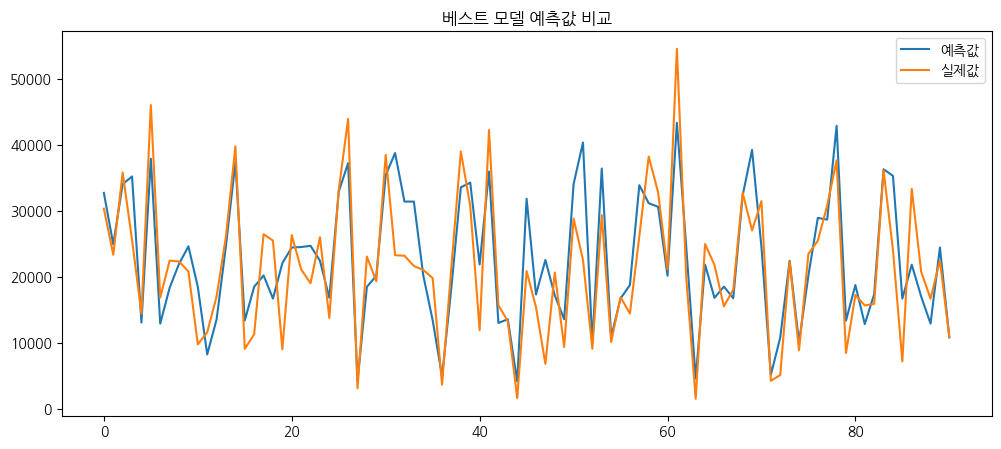

In [208]:
plt.figure(figsize=(12,5))
plt.plot(result['예측값'], linestyle='-', label='예측값');
plt.plot(result['실제값'], linestyle='-', label='실제값');
plt.title('베스트 모델 예측값 비교')
plt.legend()
plt.show()

### 5. 주/월/분기 예측
2018-05-06 - 2018-05-12. (주) 매출 예측 <br>
2018-05-01 - 2018-05-31 (월) 매출 예측 <br>
2018-04-01 - 2018-06-30 (분기) 매출 예측 

In [209]:
df_day_2018 = df_day[(df_day.index>='2018') & (df_day.index<'2019')]
df_day_2018 = df_day_2018.reset_index()
df_day_2018['order_purchase_date'] = pd.to_datetime(df_day_2018['order_purchase_timestamp'])

df_day_2018['purchase_year'] = df_day_2018['order_purchase_date'].dt.year
df_day_2018['purchase_month'] = df_day_2018['order_purchase_date'].dt.month
df_day_2018['purchase_day'] = df_day_2018['order_purchase_date'].dt.day

df_day_2018

,order_purchase_timestamp,payment_value,order_purchase_date,purchase_year,purchase_month,purchase_day
0,2018-01-01,7994.19,2018-01-01,2018,1,1
1,2018-01-02,25446.18,2018-01-02,2018,1,2
2,2018-01-03,34655.97,2018-01-03,2018,1,3
3,2018-01-04,38206.09,2018-01-04,2018,1,4
4,2018-01-05,30783.17,2018-01-05,2018,1,5
...,...,...,...,...,...,...
237,2018-08-26,9123.46,2018-08-26,2018,8,26
238,2018-08-27,5435.93,2018-08-27,2018,8,27
239,2018-08-28,4082.87,2018-08-28,2018,8,28
240,2018-08-29,1762.70,2018-08-29,2018,8,29


In [217]:
X = df_day_2018[['purchase_year','purchase_month','purchase_day']]
x_robust = robust.transform(X)
y = df_day_2018['payment_value']

result = pd.DataFrame(columns=['실제값', '예측값'])
result['실제값'] = y.round(2)
result['예측값'] = best_model.predict(x_robust).round(2)
result['차이'] = abs(result['실제값'] - result['예측값'])
result

,실제값,예측값,차이
0,7994.19,27214.98,19220.79
1,25446.18,28904.00,3457.82
2,34655.97,29906.96,4749.01
3,38206.09,31135.19,7070.90
4,30783.17,32547.26,1764.09
...,...,...,...
237,9123.46,33545.00,24421.54
238,5435.93,33525.14,28089.21
239,4082.87,32873.61,28790.74
240,1762.70,31896.30,30133.60


In [218]:
result['차이'].mean()

7847.597644628098

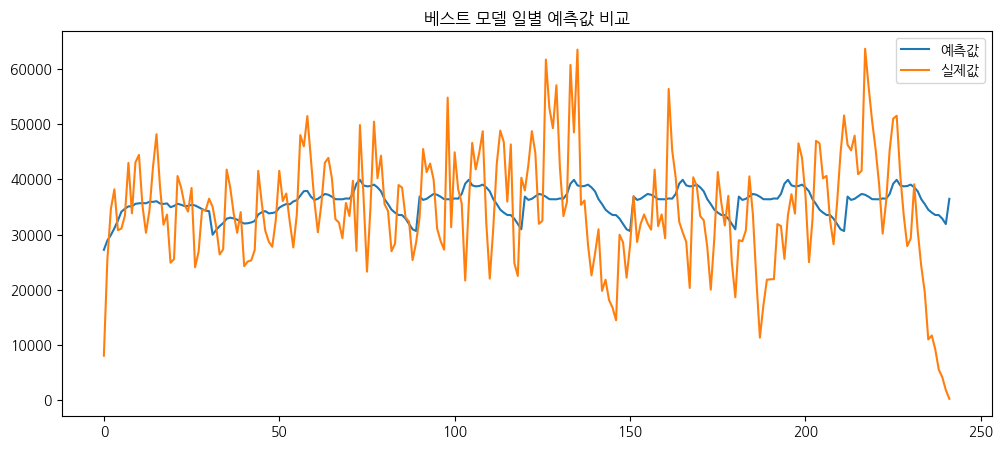

In [219]:
plt.figure(figsize=(12,5))
plt.plot(result['예측값'], linestyle='-', label='예측값');
plt.plot(result['실제값'], linestyle='-', label='실제값');
plt.title('베스트 모델 일별 예측값 비교')
plt.legend()
plt.show()

In [223]:
result['date'] = df_day_2018['order_purchase_timestamp']
result

,실제값,예측값,차이,date
0,7994.19,27214.98,19220.79,2018-01-01
1,25446.18,28904.00,3457.82,2018-01-02
2,34655.97,29906.96,4749.01,2018-01-03
3,38206.09,31135.19,7070.90,2018-01-04
4,30783.17,32547.26,1764.09,2018-01-05
...,...,...,...,...
237,9123.46,33545.00,24421.54,2018-08-26
238,5435.93,33525.14,28089.21,2018-08-27
239,4082.87,32873.61,28790.74,2018-08-28
240,1762.70,31896.30,30133.60,2018-08-29


In [243]:
real_to_won = 266.12

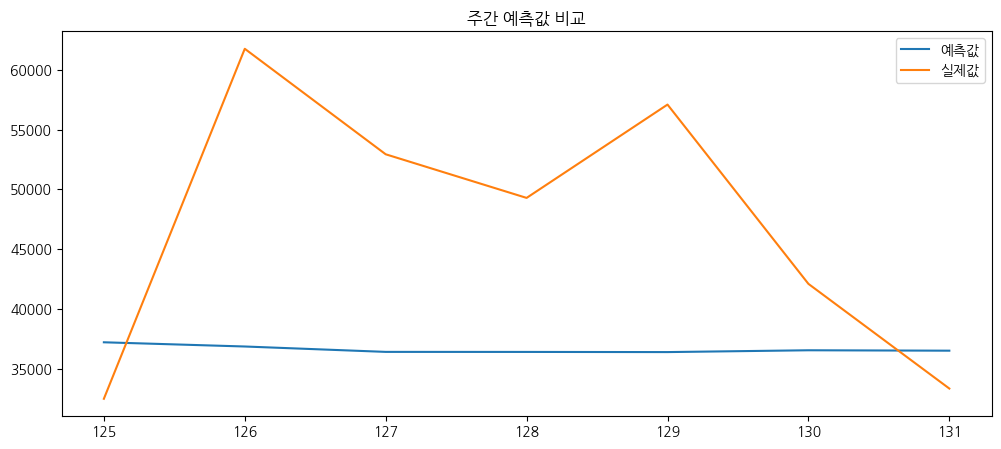

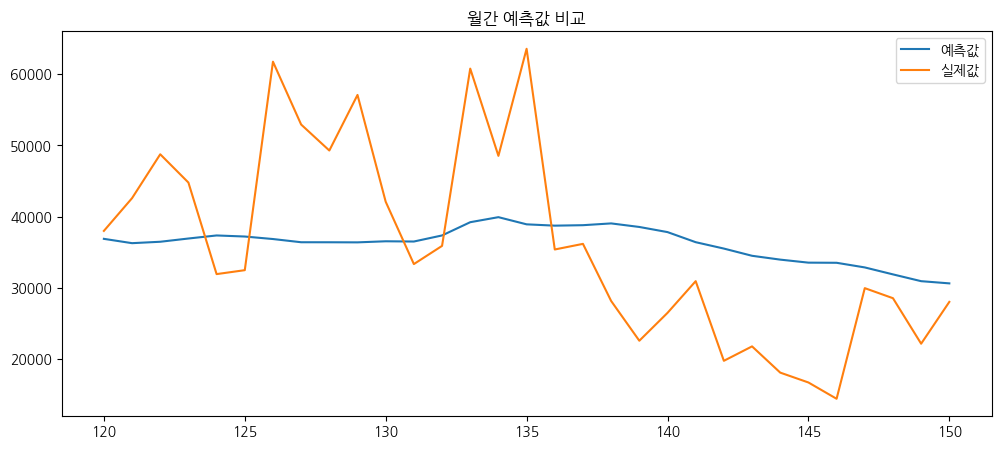

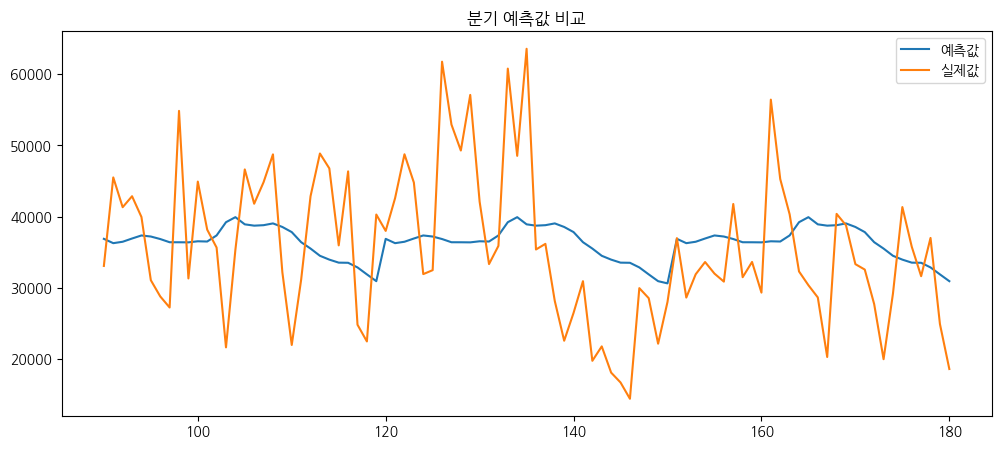

In [292]:
# 주
predict_week = result[(result['date']>='2018-05-06') & (result['date']<'2018-05-13')]

plt.figure(figsize=(12,5))
plt.plot(predict_week['예측값'], linestyle='-', label='예측값');
plt.plot(predict_week['실제값'], linestyle='-', label='실제값');
plt.title('주간 예측값 비교')
plt.legend()
plt.show()

# 월
predict_month = result[(result['date']>='2018-05-01') & (result['date']<'2018-06-01')]

plt.figure(figsize=(12,5))
plt.plot(predict_month['예측값'], linestyle='-', label='예측값');
plt.plot(predict_month['실제값'], linestyle='-', label='실제값');
plt.title('월간 예측값 비교')
plt.legend()
plt.show()

# 분기
predict_quarter = result[(result['date']>='2018-04-01') & (result['date']<'2018-07-01')]

plt.figure(figsize=(12,5))
plt.plot(predict_quarter['예측값'], linestyle='-', label='예측값');
plt.plot(predict_quarter['실제값'], linestyle='-', label='실제값');
plt.title('분기 예측값 비교')
plt.legend()
plt.show()

In [296]:
diff_df = pd.DataFrame(index=['주','월','분기'], columns=['실제값', '예측값', '금액차이(R$)','금액차이(만원)', '실제값과 차이 비율'])
diff_df['실제값'] = [real_week_pay_val, real_month_pay_val, real_quater_pay_val]
diff_df['예측값'] = [predict_week_pay_val, predict_month_pay_val, predict_quater_pay_val]
diff_df['금액차이(R$)'] = [diff_week_pay_val, diff_month_pay_val, diff_quater_pay_val]
diff_df['금액차이(만원)'] = [int(diff_week_pay_val * real_to_won / 10000), int(diff_month_pay_val * real_to_won/ 10000), int(diff_quater_pay_val * real_to_won/ 10000)]
diff_df['실제값과 차이 비율'] = [round(diff_week_pay_val/real_week_pay_val*100,2),  round(diff_month_pay_val/real_month_pay_val*100,2), round(diff_quater_pay_val/real_quater_pay_val*100,2)]
diff_df

,실제값,예측값,금액차이(R$),금액차이(만원),실제값과 차이 비율
주,329034.28,256343.50,72690.78,1934,22.09
월,1123196.15,1122562.59,633.56,16,0.06
분기,3246204.91,3306420.57,60215.66,1602,1.85
